# Computer vision final project

This project was prepered for computer vision course final project. I have done some task for embedding QR code to an image.  
I have tasks below for emcoding and decoding:
  
## Encoding  

- Fetching and QR code and image to from hard disk.
- Resizing both image and QR code to the same size.
- Converting image from RGB to HSL color model.
- Converting resized QR code to the gray scale.
- changing the grayscale matrix from 0-255 to 0-1.
- In gray scale QR code matrix changing the number smaller than 0.5 to 0.45 and bigger than 0.5 to 0.55 .
- Changing the saturation layer of image with new Gray scale matrix.
- Convert new HSL matrix to RGB image.  

## Decoding  

- Converting RGB encoded image to HSL.
- Extraction L layer and changing the number from smaller than 0.5 to 0 and bigger than 0.5 to 255.
- converting QR code gray scale matrix to an image.

In [1]:
import cv2
import colorsys
import numpy as np
from PIL import Image

In [2]:
img = Image.open('/home/hadi/vision/input2.jpg')

img2 = Image.open('/home/hadi/vision/QRCode1.png')

resizedImage = img.resize((200,200))   # image resizing

resizedQRCode = img2.resize((200,200))

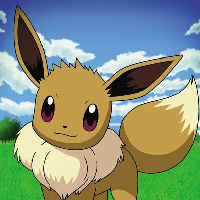

In [3]:
resizedImage

In [4]:
RGBArray=np.array(resizedImage)


In [5]:
# RGBArray

In [6]:
bgr = np.float32(RGBArray)/255

In [7]:
bgr

array([[[0.20392157, 0.24705882, 0.5686275 ],
        [0.20392157, 0.24705882, 0.5686275 ],
        [0.20392157, 0.24705882, 0.5686275 ],
        ...,
        [0.21176471, 0.24313726, 0.56078434],
        [0.21176471, 0.24313726, 0.56078434],
        [0.21176471, 0.24313726, 0.56078434]],

       [[0.20392157, 0.24705882, 0.5686275 ],
        [0.20392157, 0.24705882, 0.5686275 ],
        [0.20392157, 0.24705882, 0.5686275 ],
        ...,
        [0.21176471, 0.24313726, 0.56078434],
        [0.21176471, 0.24313726, 0.56078434],
        [0.21176471, 0.24313726, 0.56078434]],

       [[0.20392157, 0.24705882, 0.5686275 ],
        [0.20392157, 0.24705882, 0.5686275 ],
        [0.20392157, 0.24705882, 0.5686275 ],
        ...,
        [0.21176471, 0.24313726, 0.5686275 ],
        [0.21176471, 0.24313726, 0.5686275 ],
        [0.21176471, 0.24313726, 0.5686275 ]],

       ...,

       [[0.23137255, 0.72156864, 0.25882354],
        [0.13333334, 0.64705884, 0.2       ],
        [0.11372549, 0

In [8]:
HLS=bgr
for i in range(0, 200):
    for j in range(0,200):
        b=bgr[i,j,0]
        g=bgr[i,j,1]
        r=bgr[i,j,2]
        hsl=colorsys.rgb_to_hls(r,g,b)
        HLS[i,j,:] = hsl

        

In [9]:
# HLS

In [10]:
qrCodeGreayScale = cv2.imread('/home/hadi/vision/resizedQRCode.png',cv2.IMREAD_GRAYSCALE)

In [11]:
qrCodeGreayScale.shape

(200, 200)

In [12]:
qrCodeGreayScale=np.float32(qrCodeGreayScale)/255

In [13]:
# qrCodeGreayScale

In [14]:
for i in range(0, 200):
    for j in range(0,200):
        if(qrCodeGreayScale[i,j]<0.5):
            qrCodeGreayScale[i,j]=0.45
        else:
            qrCodeGreayScale[i,j]=0.55

putting the tuning gray scale instead of saturation layer.

In [15]:
newHLSArray=HLS
newHLSArray[:,:,2]=qrCodeGreayScale

In [16]:
# newHLSArray

In [17]:
newRGB=newHLSArray
for i in range(0, 200):
    for j in range(0,200):
        h=newHLSArray[i,j,0]
        l=newHLSArray[i,j,1]
        s=newHLSArray[i,j,2]
        rgb=colorsys.hls_to_rgb(h,l,s)
        newRGB[i,j,:] = rgb

In [18]:
# newRGB

In [19]:
newRGB.shape

(200, 200, 3)

For decoding save the image whith the name RGBEncode2.png and then comment below code and run all again.

In [20]:
    cv2.imshow("RGB",newRGB)
    cv2.waitKey()
    cv2.destroyAllWindows()

## Encoding  

- ~Fetching and QR code and image to from hard disk~.(**Done**)
- ~Resizing both image and QR code to the same size~.(**Done**)
- ~Converting image from RGB to HSL color model~.(**Done**)
- ~Converting resized QR code to the gray scale~.(**Done**)
- ~changing the grayscale matrix from 0-255 to 0-1~.(**Done**)
- ~In gray scale QR code matrix changing the number smaller than 0.5 to 0.45 and bigger than 0.5 to 0.55~.(**Done**)
- ~Changing the saturation layer of image with new Gray scale matrix~.(**Done**)
- ~Convert new HSL matrix to RGB image~.(**Done**)  

## Decoding  

- Converting RGB encoded image to HSL.
- Extraction L layer and changing the number from smaller than 0.5 to 0 and bigger than 0.5 to 255.
- converting QR code gray scale matrix to an image.

## decode process

In [21]:
encodedImage = Image.open('/home/hadi/vision/RGBEncode2.png')

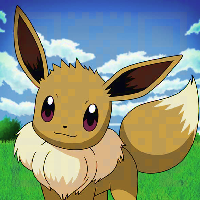

In [22]:
encodedImage

In [23]:
RGBEncodeArray=np.array(encodedImage)

In [24]:
# RGBEncodeArray

In [25]:
RGBEncodeArray=np.float32(RGBEncodeArray)/255

In [26]:
# RGBEncodeArray

In [27]:
HLS2=RGBEncodeArray
for i in range(0, 200):
    for j in range(0,200):
        b=bgr[i,j,0]
        g=bgr[i,j,1]
        r=bgr[i,j,2]
        hsl=colorsys.rgb_to_hls(r,g,b)
        HLS2[i,j,:] = hsl

        

In [28]:
# HLS2

In [29]:
qrDecode=np.zeros((200,200))

In [30]:
qrDecode.shape

(200, 200)

In [31]:
qrDecode=HLS2[:,:,2]

In [32]:
qrDecode

array([[0.55      , 0.55      , 0.55      , ..., 0.55      , 0.55      ,
        0.55      ],
       [0.55      , 0.55      , 0.55      , ..., 0.55      , 0.55      ,
        0.55      ],
       [0.55      , 0.55      , 0.55      , ..., 0.54999995, 0.54999995,
        0.54999995],
       ...,
       [0.5500001 , 0.54999995, 0.54999995, ..., 0.55      , 0.54999995,
        0.55      ],
       [0.55      , 0.5500001 , 0.5500001 , ..., 0.55      , 0.5500001 ,
        0.5500001 ],
       [0.55      , 0.55      , 0.5500001 , ..., 0.54999995, 0.54999995,
        0.54999995]], dtype=float32)

In [33]:
for i in range(0, 200):
    for j in range(0,200):
        if(qrDecode[i,j]<0.5):
            qrDecode[i,j]=0.0
        else:
            qrDecode[i,j]=255

In [34]:
qrDecode

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]], dtype=float32)

In [ ]:
    cv2.imshow("RGB",qrDecode)
    cv2.waitKey()
    cv2.destroyAllWindows()

## Encoding  

- ~Fetching and QR code and image to from hard disk~.(**Done**)
- ~Resizing both image and QR code to the same size~.(**Done**)
- ~Converting image from RGB to HSL color model~.(**Done**)
- ~Converting resized QR code to the gray scale~.(**Done**)
- ~changing the grayscale matrix from 0-255 to 0-1~.(**Done**)
- ~In gray scale QR code matrix changing the number smaller than 0.5 to 0.45 and bigger than 0.5 to 0.55~.(**Done**)
- ~Changing the saturation layer of image with new Gray scale matrix~.(**Done**)
- ~Convert new HSL matrix to RGB image~.(**Done**)  

## Decoding  

- ~Converting RGB encoded image to HSL~.(**Done**)
- ~Extraction L layer and changing the number from smaller than 0.5 to 0 and bigger than 0.5 to 255~.(**Done**)
- ~Converting QR code gray scale matrix to an image~.(**Done**)